# Solving equations using a graphical method
My hypothesis is that the intersection point of the x and y axes of a straight line drawn to the intersection points of two circles can also be calculated with an equation.

IntSlider(value=5, description='cx1', max=8, min=-8)

IntSlider(value=-5, description='cy1', max=8, min=-8)

IntSlider(value=6, description='rx1', max=8, min=1)

IntSlider(value=-4, description='cx2', max=8, min=-8)

IntSlider(value=-1, description='cy2', max=8, min=-8)

IntSlider(value=5, description='rx2', max=8, min=1)

Button(description='Plot', style=ButtonStyle())

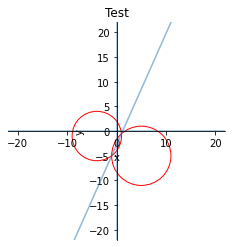

x=
1.2222222222222223
y=
-2.7500000000000004

5⋅x - 5⋅y = 6
-4⋅x + y = 5

{x: -31/15, y: -49/15}


In [17]:
import matplotlib.pyplot as plt
import numpy as np
import math    
import ipywidgets as widgets
from IPython.display import display
from IPython.display import clear_output
import sympy as sp

def get_line_intersection(line1, line2):
    xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
    ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1])

    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    div = det(xdiff, ydiff)
    if div == 0:
       return None

    d = (det(*line1), det(*line2))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    return x, y

def get_intersections(x0, y0, r0, x1, y1, r1):
    # circle 1: (x0, y0), radius r0
    # circle 2: (x1, y1), radius r1

    d=math.sqrt((x1-x0)**2 + (y1-y0)**2)
    
    # non intersecting
    if d > r0 + r1 :
        return None
    # One circle within other
    if d < abs(r0-r1):
        return None
    # coincident circles
    if d == 0 and r0 == r1:
        return None
    else:
        a=(r0**2-r1**2+d**2)/(2*d)
        h=math.sqrt(r0**2-a**2)
        x2=x0+a*(x1-x0)/d   
        y2=y0+a*(y1-y0)/d   
        x3=x2+h*(y1-y0)/d     
        y3=y2-h*(x1-x0)/d 

        x4=x2-h*(y1-y0)/d
        y4=y2+h*(x1-x0)/d
        
        return ((x3, y3), (x4, y4))
    
def calcValues():
    # Init variables
    c1x=wcx1.value
    c1y=wcy1.value
    c2x=wcx2.value
    c2y=wcy2.value
    r1=wr1.value
    r2=wr2.value
    xaxisMax = max(abs(c1x)+r1, abs(c2x)+r2)*2
    yaxisMax = max(abs(c1y)+r1, abs(c2y)+r2)*2

    fig, ax = plt.subplots()
    plt.axis([-xaxisMax, xaxisMax, -yaxisMax, yaxisMax])
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.set_title('Test')
    ax.set_aspect('equal')

    c1=plt.Circle((c1x,c1y),r1, fill=False, color='red')
    c2=plt.Circle((c2x,c2y), r2, fill=False, color='red')
    ax.add_artist(c1)
    ax.add_artist(c2)
    l=get_intersections(c1x,c1y, r1,c2x,c2y,r2)
    if l!=None:
        plt.axline(l[0],l[1], alpha=0.5)

    axisXLine=((-xaxisMax,0),(xaxisMax,0))
    plt.axline(axisXLine[0],axisXLine[1], alpha=0.5)
    axisYLine=((0,-yaxisMax),(0, yaxisMax))
    plt.axline(axisYLine[0],axisYLine[1], alpha=0.5)
               
    plt.show()
    
    gx=get_line_intersection(axisXLine, (l[0],l[1]))[0]
    gy=get_line_intersection(axisYLine, (l[0],l[1]))[1]
    print('x=')
    print(gx)
    print('y=')
    print(gy)
    
    x, y = symbols('x, y')
    eq1 = sp.Eq(c1x*x + c1y*y, r1)
    eq2 = sp.Eq(c2x*x + c2y*y, r2)
    print()
    sp.pprint(eq1)
    sp.pprint(eq2)
    ans = sp.solve((eq1,eq2), (x, y))
    print()
    print(ans)


wcx1 = widgets.IntSlider(value=5, min=-8,max=8,description='cx1')
wcy1 = widgets.IntSlider(value=3, min=-8,max=8,description='cy1')
wr1 = widgets.IntSlider(value=5, min=1,max=8,description='rx1')
wcx2 = widgets.IntSlider(value=9, min=-8,max=8,description='cx2')
wcy2 = widgets.IntSlider(value=8, min=-8,max=8,description='cy2')
wr2 = widgets.IntSlider(value=5, min=1,max=8,description='rx2')

button = widgets.Button(
    description='Plot',
)

def showWidgets():
    clear_output()
    display(wcx1)
    display(wcy1)
    display(wr1)
    display(wcx2)
    display(wcy2)
    display(wr2)
    display(button)    

@button.on_click
def plot_on_click(b):
    showWidgets()
    calcValues()
    
showWidgets()
calcValues()